# Continuous Distributions

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/11-Continuous-Distributions.ipynb)

Until now we have been dealing with discrete distributions, where the random variable can only take on a finite number of values. In this notebook, we will introduce continuous distributions, where the random variable can take on any value in a given range.

The continuous distributions differ from the discrete distributions in that the probability of a single value is zero. Instead, the probability is defined over intervals. Just like the probability mass function fully describes a discrete distribution, a continuous distribution is fully described by its probability density function (PDF).


A PDF is a non-negative function $f(x)$ that integrates to 1 over the entire real line. Let $X$ be a continuous random variable with PDF $f(x)$. Then, for any two values. 

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x) dx
$$

The CDF of a continuous random variable is defined just as in the discrete case with the sum replaced by an integral:

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt
$$


## The Uniform Distribution on \[-1, 1\]

$$
X \sim \text{Uniform}(-1, 1)
$$

$$
f(x) = \begin{cases}
\frac{1}{2} & -1 \leq x \leq 1\\
0 & \text{otherwise}
\end{cases} \\
$$

The density function of the uniform distribution is a constant over the interval \([-1, 1]\). The probability of the random variable falling in any subinterval of \([-1, 1]\) is proportional to the length of the subinterval.


Text(0, 0.5, 'Density')

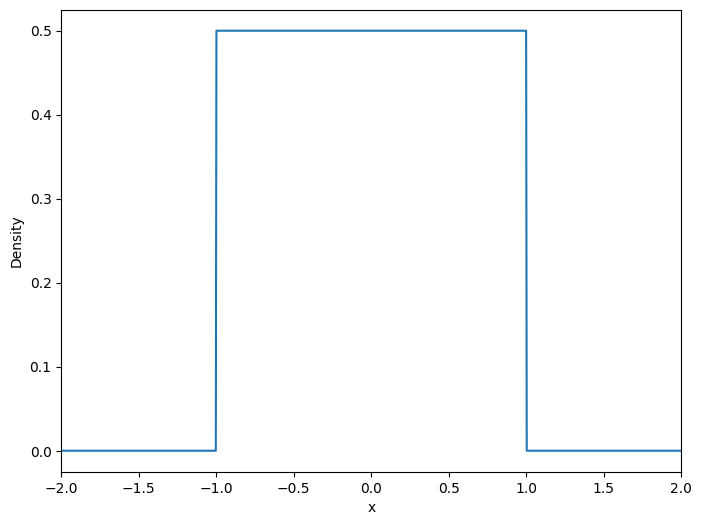

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Define the range of x
x = np.linspace(-2, 2, 1000)

# Calculate the density of the uniform distribution
y = stats.uniform.pdf(x, loc=-1, scale=2)


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Density')

In [2]:
# Draw 10 random values from the uniform distribution between -1 and 1

x_unif = np.random.uniform(low=-1, high=1, size=10)
x_unif

array([ 0.89246008,  0.2469271 ,  0.0077735 ,  0.34169116,  0.66448677,
       -0.5312525 , -0.99975831, -0.20862682,  0.18344808,  0.71344387])

In [3]:
# How many of the random numbers are smaller than 0? Use np.sum to count the number of random numbers that satisfy the condition.

print("Number of results less than zero =", np.sum(x_unif < 0))

# How many of the random numbers are between 0 and 0.5?

print("Number of results between 0 and 0.5 =", np.sum((x_unif > 0) & (x_unif < 0.5)))

Number of results less than zero = 3
Number of results between 0 and 0.5 = 4


In [4]:
# Calculate the probability of X being less than 0. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

print("P(X < 0) =", stats.uniform.cdf(0, loc=-1, scale=2))


# Calculate the probability of X being greater than 0.5.

print("P(X > 0.5) =", 1 - stats.uniform.cdf(0.5, loc=-1, scale=2))

# Calculate the probability that the event X is in the interval [0, 0.5] occurs.

print("P(0 < X < 0.5) =", stats.uniform.cdf(0.5, loc=-1, scale=2) - stats.uniform.cdf(0, loc=-1, scale=2))

# Compare the probability with the number of values in the simulation that lie in the interval [0, 0.5].

print("Number of values in the interval [0, 0.5]:", np.sum((x_unif > 0) & (x_unif < 0.5)))

print("Share of values in the interval [0, 0.5]:", np.mean((x_unif > 0) & (x_unif < 0.5)))

P(X < 0) = 0.5
P(X > 0.5) = 0.25
P(0 < X < 0.5) = 0.25
Number of values in the interval [0, 0.5]: 4
Share of values in the interval [0, 0.5]: 0.4


Text(0, 0.5, 'Density')

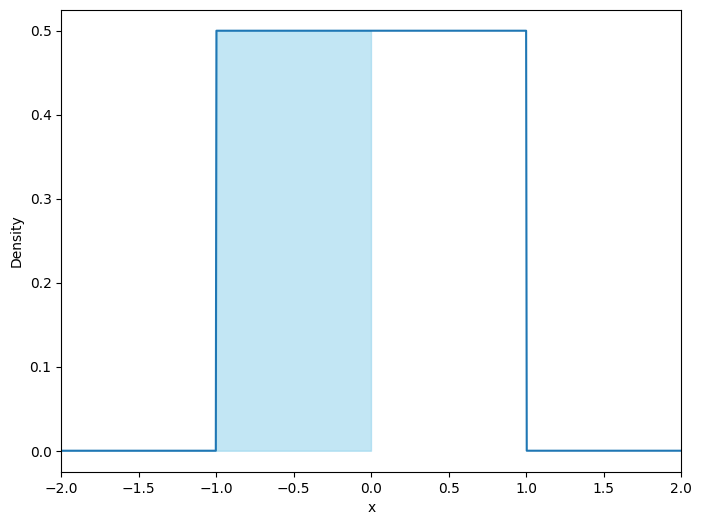

In [5]:
# Visualize the probability of X being less than 0 as the area under the curve.

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x < 0), color='skyblue', alpha=0.5)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

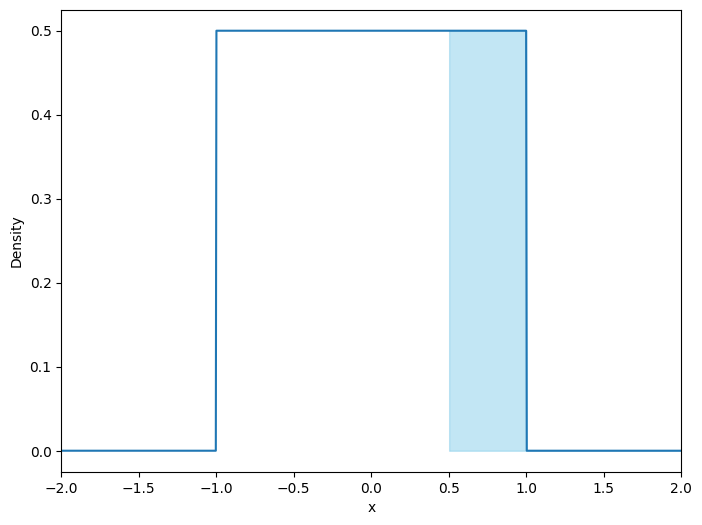

In [6]:
# Visualize the probability of X being greater than 0.5 as the area under the curve.

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x > 0.5), color='skyblue', alpha=0.5)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

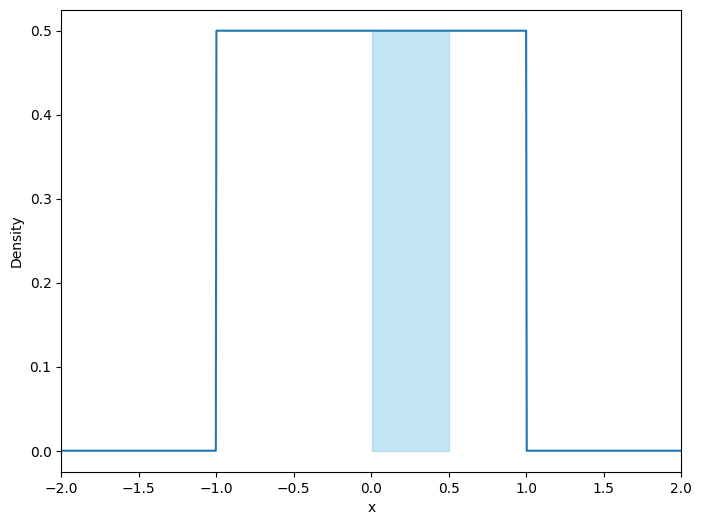

In [7]:
# Visualize the probability of X being in the interval [0, 0.5] as the area under the curve.

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=((x > 0) & (x < 0.5)), color='skyblue', alpha=0.5)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Density')


## Moments of a Continuous Distribution

The moments of a continuous distribution are defined in the same way as for a discrete distribution, but the summation is replaced by an integral. The expected value of a continuous random variable $X$ is given by:

$$
E(X) = \int_{-\infty}^{\infty} x f(x) dx
$$

The variance of a continuous random variable $X$ is given by:

$$
\text{Var}(X) = \int_{-\infty}^{\infty} (x - E(X))^2 f(x) dx
$$

All properties of the expected value and variance that we have seen for discrete distributions also hold for continuous distributions.


:::{#exm-uniform-distribution}
## Moments of the Uniform Distribution

The density function of the uniform distribution on an interval $[a, b], a < b$ is:

$$
f(x) = \begin{cases}
\frac{1}{b - a} & a \leq x \leq b\\
0 & \text{otherwise}
\end{cases}
$$

The expected value is:

$$
\begin{align*}
E(X) & = \int_{-\infty}^{\infty} x \frac{1}{b - a} dx \\
     & = \int_{a}^{b} x \frac{1}{b - a} dx \\
     & = \frac{1}{b - a} \frac{1}{2} x^2 \Big|_{a}^{b} \\
     & = \frac{1}{b - a} \frac{1}{2} (b^2 - a^2) \\
     & = \frac{1}{\cancel{b - a}} \frac{1}{2} (\cancel{b - a})(b + a) \\
     & = \frac{1}{2} (a + b)
\end{align*}
$$

We can obtain the variance using the formula $Var(X) = E(X^2) - E(X)^2$: The expected value of $X^2$ is:

$$
\begin{align*}
E(X^2) & = \int_{-\infty}^{\infty} x^2 \frac{1}{b - a} dx \\
       & = \int_{a}^{b} x^2 \frac{1}{b - a} dx \\
       & = \frac{1}{b - a} \frac{1}{3} x^3 \Big|_{a}^{b} \\
       & = \frac{1}{b - a} \frac{1}{3} (b^3 - a^3) \\
       & = \frac{1}{b - a} \frac{1}{3} (b - a)(b^2 + ab + a^2) \\
       & = \frac{1}{3} (b^2 + ab + a^2)
\end{align*}
$$

The variance is then:

$$
\begin{align*}
Var(X) & = E(X^2) - E(X)^2 \\
       & = \frac{1}{3} (b^2 + ab + a^2) - \left(\frac{1}{2} (a + b)\right)^2 \\
       & = \frac{1}{3} (b^2 + ab + a^2) - \frac{1}{4} (a^2 + 2ab + b^2) \\
       & = \frac{1}{3} b^2 + \frac{1}{3} ab + \frac{1}{3} a^2 - \frac{1}{4} a^2 - \frac{1}{2} ab - \frac{1}{4} b^2 \\
       & = \frac{1}{12} b^2 - \frac{1}{6} ab + \frac{1}{12} a^2 \\
       & = \frac{1}{12} (b - a)^2
\end{align*}
$$




:::

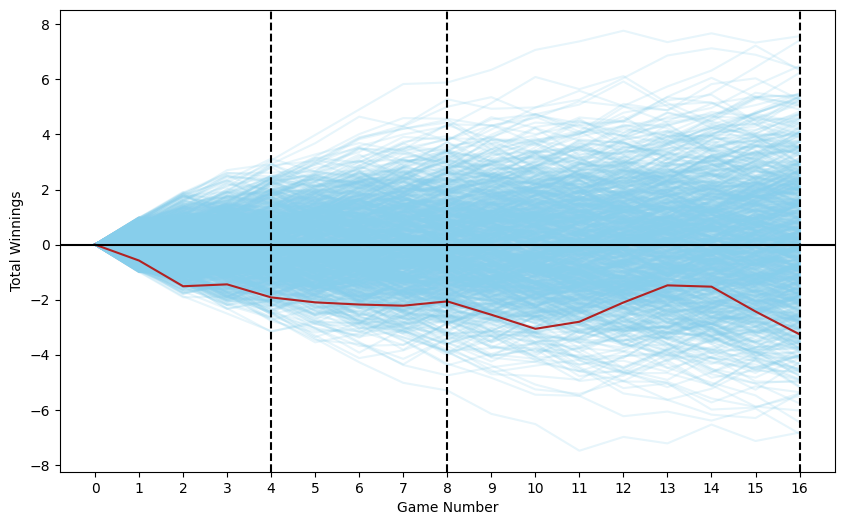

In [8]:
players_n = 1000
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(
    np.array(
        np.meshgrid(
            np.arange(1, games_n + 1),
            np.arange(1, players_n + 1)
        )).T.reshape(-1, 2),
    columns=['game', 'player']
)

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame(
    {'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'],
             color='skyblue', alpha=0.2)

# First player
player_data = unif_games[unif_games['player'] == 1]
plt.plot(player_data['game'], player_data['running_total'],
         color='firebrick', label='Player 1')

plt.axhline(0, color='black')

for mark in [4, 8, 16]:
    plt.axvline(x=mark, linestyle='--', color='black')

plt.xlabel('Game Number')
plt.ylabel('Total Winnings')
plt.xticks(range(0, 17, 1))
plt.show()

Text(0.5, 0, 'Running total')

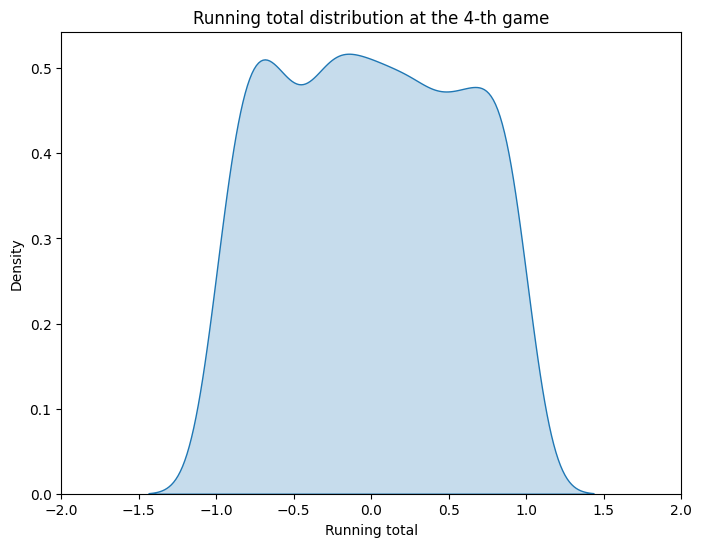

In [9]:
game_4 = unif_games[unif_games['game'] == 1]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_4, x='running_total', fill=True)
plt.xlim((-2, 2))
plt.title('Running total distribution at the 4-th game')
plt.xlabel('Running total')

## The Normal Distribution

The normal distribution is the most important continuous distribution in statistics. It is symmetric around the mean and has a bell-shaped curve. The PDF of the normal distribution is given by:


$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

As a shorthand notation, we write:

$$
X \sim N(\mu, \sigma^2)
$$

to say that $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$. You do not need to memorize the formula for the normal distribution PDF, but you should a couple of important properties:


Text(0, 0.5, 'Density')

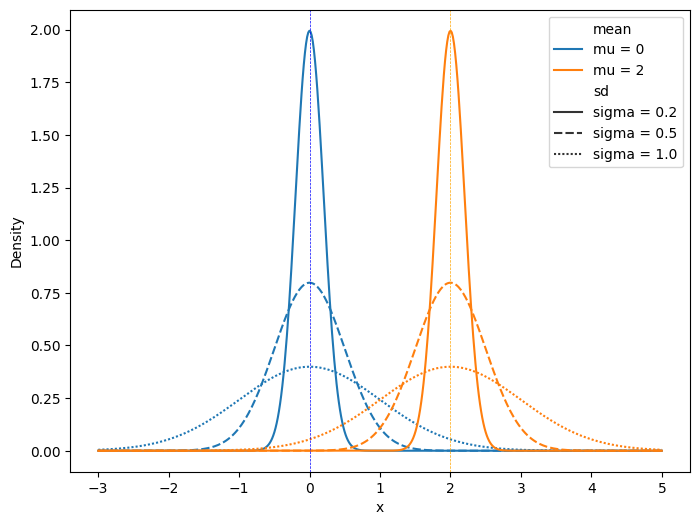

In [10]:
# Visualize the density of the normal distribution with different means and standard deviations

# Define the means and standard deviations for which we want to plot the normal distribution

means = [0, 2]
sds = [0.2, 0.5, 1]

# Create a grid of x values
x = np.linspace(-3, 5, 500)

# Create a DataFrame with all combinations of means, sds, and x values
df = pd.DataFrame([(mean, sd, x_val, stats.norm.pdf(x_val, mean, sd)) 
                   for mean in means for sd in sds for x_val in x], 
                  columns=['mean', 'sd', 'x', 'y'])

# Create labels for mean and sd
df['mean'] = r'mu = ' + df['mean'].astype(str)
df['sd'] = r'sigma = ' + df['sd'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='x', y='y', hue='mean', style='sd')
plt.axvline(0, color='blue', linestyle='--', linewidth=0.5)
plt.axvline(2, color='orange', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Density')


:::{.callout-important}
## Properties of the Normal Distribution


$$
\begin{align*}
E(X) & = \mu \\
Var(X) & = \sigma^2
\end{align*}
$$

If $X \sim N(\mu, \sigma^2)$, then $Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$ is called the standard normal distribution. The standard normal distribution has mean 0 and variance 1.

If $X_1, X_2, \ldots, X_n$ are independent and identically distributed (i.i.d.) random variables with mean $\mu$ and variance $\sigma^2$, then sum of the random variables is normally distributed:

$$
\sum_{i=1}^{n} X_i \sim N(n\mu, n\sigma^2)
$$

:::

It turns out the sum of independent random variables from any distribution (as long as the variance is finite) approaches a normal distribution as the number of variables increases. This is known as the central limit theorem. The central limit theorem is one of the most important results in statistics and is the reason why the normal distribution is so important.

:::{#thm-central-limit-theorem}
## Central Limit Theorem

Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with mean $\mu$ and variance $\sigma^2$. Let $S_n = \sum_{i=1}^{n} X_i$. Then, as $n$ approaches infinity, the distribution of $\frac{S_n - n\mu}{\sqrt{n}\sigma}$ approaches the standard normal distribution.

$$
\frac{S_n - n\mu}{\sqrt{n}\sigma} \xrightarrow{d} N(0, 1)
$$

:::

## Normal Distribution (Probabilities)

As with other distributions, we can calculate probabilities with the normal distribution using the CDF, which is the integral of the PDF over the interval \(-\infty, x\). The CDF of the normal distribution does not have a closed-form solution, but it can be calculated using numerical methods or software. Before the advent of computers, tables were used to look up the values of the CDF for different values of \(x\). These tables are known as z-tables. As it is not possible to create tables for all possible values of \(\mu\) and \(\sigma\), the tables are usually for the standard normal distribution, so we need to standardize the random variable before looking up the value in the table.

:::{.callout-importnat}
## Standardizing a Random Variable

For any random variable with expected value \(\mu\) and variance \(\sigma^2\), we can standardize the random variable by subtracting the mean and dividing by the standard deviation:

$$
Z = \frac{X - \mu}{\sigma}
$$

The resulting random variable \(Z\) has mean 0 and variance 1. To see this, simply calculate the expected value and variance of \(Z\):

$$
\begin{align*}
E(Z) & = E\left(\frac{X - \mu}{\sigma}\right) = \frac{E(X) - \mu}{\sigma} = 0 \\
Var(Z) & = Var\left(\frac{X - \mu}{\sigma}\right) = \frac{Var(X)}{\sigma^2} = 1
\end{align*}
$$

Note that $\mu$ and $\sigma$ are not random variables but constants.

:::

:::{#exr-normal-distribution-probabilities}
## Probabilities with the Normal Distribution

Calculate the following probabilities for the standard normal distribution. Let the level of a river be normally distributed with mean 7 (meters) and standard deviation ($\sigma$) 1.5. Let us say that the river is in flood when the level is above 9 meters and in drought when the level is below 5 meters.

1. What is the probability that the river is in flood?
2. What is the probability that the river is in drought?
3. What is the probability that the river is between 5 and 9 meters?

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

1. The probability that the river is in flood is given by:

$$
P(X > 9) = 1 - P(X \leq 9) = 1 - F(9)
$$

where \(F(x)\) is the CDF of the normal distribution. With access to computer software, we can compute the CDF directly (see the result below). If you must use a z-table, you need to standardize first:

$$
P(X > 9) = 1 - P\left(\frac{X - 7}{1.5} \leq \frac{9 - 7}{1.5}\right) = 1 - P(Z \leq 1.33) = 1 - 0.90878 = 0.09121
$$

:::

In [11]:
# Compute the probabilities with scipy.stats

# Probability that the river level is over 9 meters. In the following code loc is the mean and scale is the standard deviation.

print(1 - stats.norm.cdf(9, loc=7, scale=1.5))

# The same probability using the standard normal distribution

print(1 - stats.norm.cdf((9 - 7) / 1.5))

0.09121121972586788
0.09121121972586788


Text(0.5, 1.0, 'P(X > 9) = 0.0912')

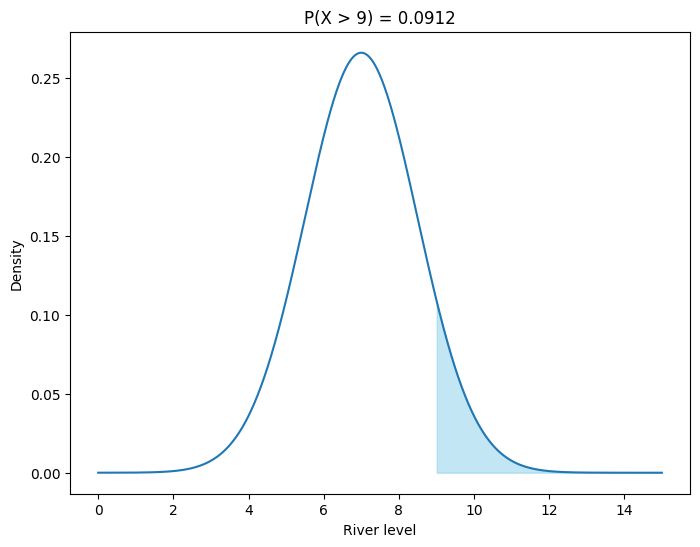

In [12]:
# Show the probability as an area under the curve

x = np.linspace(0, 15, 1000)

y = stats.norm.pdf(x, loc=7, scale=1.5)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x > 9), color='skyblue', alpha=0.5)
plt.xlabel('River level')
plt.ylabel('Density')
plt.title('P(X > 9) = 0.0912')

In [13]:
# Probability that the river is in drought (below 6 meters).

print(stats.norm.cdf(6, loc=7, scale=1.5))

# The same probability using the standard normal distribution.

print(stats.norm.cdf((6 - 7) / 1.5))

0.2524925375469229
0.2524925375469229


Text(0.5, 1.0, 'P(X < 6) = 0.25249')

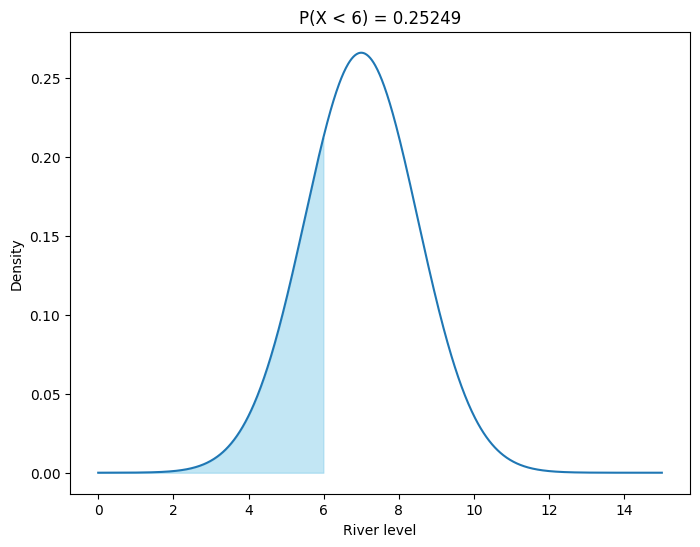

In [14]:
x = np.linspace(0, 15, 1000)

y = stats.norm.pdf(x, loc=7, scale=1.5)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x < 6), color='skyblue', alpha=0.5)
plt.xlabel('River level')
plt.ylabel('Density')
plt.title('P(X < 6) = 0.25249')

In [15]:
# Probability that the river level is between 6 and 9 meters (not in drought and not in flood)

print(stats.norm.cdf(9, loc=7, scale=1.5) - stats.norm.cdf(6, loc=7, scale=1.5))

# The same probability, calculated using the standard normal distribution

print(stats.norm.cdf((9 - 7) / 1.5) - stats.norm.cdf((6 - 7) / 1.5))


0.6562962427272092
0.6562962427272092


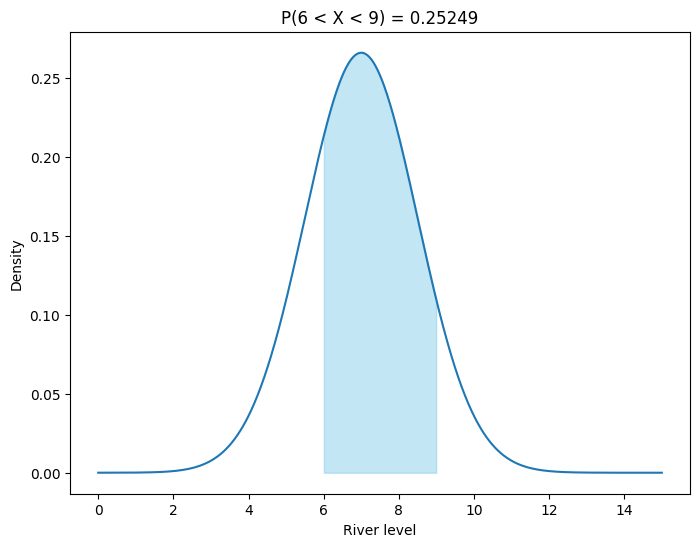

In [16]:
x = np.linspace(0, 15, 1000)

y = stats.norm.pdf(x, loc=7, scale=1.5)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x > 6) & (x < 9), color='skyblue', alpha=0.5)
plt.xlabel('River level')
plt.ylabel('Density')
plt.title('P(6 < X < 9) = 0.25249')
plt.show()

In [17]:
# Create a z-table for the 

import pandas as pd
import numpy as np
from scipy.stats import norm

# Define the range of z-scores
z_scores = np.arange(-3.0, 3.1, 0.1)

# Calculate the probabilities for each z-score
probabilities = norm.cdf(z_scores)

# Create a DataFrame
df = pd.DataFrame({
    'z': z_scores,
    'P(x < Z)': probabilities
})

df

,z,P(x < Z)
0,-3.0,0.001350
1,-2.9,0.001866
2,-2.8,0.002555
3,-2.7,0.003467
4,-2.6,0.004661
...,...,...
56,2.6,0.995339
57,2.7,0.996533
58,2.8,0.997445
59,2.9,0.998134


:::{#exr-normal-distribution-probabilities}

Assume that the weight of adults in Sofia is normally distributed with mean 70 kg and standard deviation 10 kg. The lift in a building can carry a maximum of 550 kg. What is the probability that carry capacity of the lift is exceeded if 7 adults enter the lift?

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)


:::

In [18]:
# Calculate the probability 

In [19]:
# Sample 5 persons at random from a normal population with mean 70 and sd = 10
import numpy as np

R = 100000
n = 7
mu = 70
sd = 10

simulations = np.random.randn(R, n)*10 + 70
simulations



array([[90.10390468, 62.56139445, 70.55827898, ..., 73.38875151,
        77.91148949, 62.69536816],
       [79.22470279, 58.71703135, 66.63235375, ..., 78.05219129,
        60.32258027, 48.02600778],
       [69.6160326 , 62.67585886, 63.87338903, ..., 86.21340652,
        60.48755234, 91.84476972],
       ...,
       [75.58175669, 82.22560923, 79.15491785, ..., 64.46377183,
        72.8926466 , 73.87337101],
       [64.97095975, 56.17998421, 69.33101117, ..., 80.56912804,
        69.45985748, 62.97050371],
       [37.73495691, 77.56464578, 83.99643999, ..., 65.42777357,
        85.36638729, 82.44608761]], shape=(100000, 7))

In [20]:
weight = np.sum(simulations, axis = 1)
weight

array([501.14779654, 454.07030169, 517.39790414, ..., 518.99844607,
       465.80969202, 487.98788635], shape=(100000,))

In [21]:
np.mean(weight > 550)

np.float64(0.0109)

In [22]:
np.max(weight)

np.float64(599.5053179791533)

## Standard Deviation and Probability

For a normal distribution, the probability that a random variable falls within a certain number of standard deviations from the mean can be calculated using the CDF. The probability that a random variable falls within one standard deviation of the mean is approximately 68%, within two standard deviations is approximately 95%, and within three standard deviations is approximately 99.7%.

Let $X \sim N(\mu, \sigma^2)$:

- $P(\mu - \sigma < X < \mu + \sigma) \approx 0.68$
- $P(\mu - 2\sigma < X < \mu + 2\sigma) \approx 0.95$
- $P(\mu - 3\sigma < X < \mu + 3\sigma) \approx 0.99$


In [23]:
# See this with code
# Run the code for different value of mu and sd and see that the probabilities don't change

mu = 70
sd = 10

# One sigma above and below the mean
print(stats.norm.cdf(mu + sd, loc=mu, scale=sd) - stats.norm.cdf(mu - sd, loc=mu, scale=sd))

# Two sigma above and below the mean
print(stats.norm.cdf(mu + 2*sd, loc=mu, scale=sd) - stats.norm.cdf(mu - 2*sd, loc=mu, scale=sd))

# Three sigma above and below the mean
print(stats.norm.cdf(mu + 3*sd, loc=mu, scale=sd) - stats.norm.cdf(mu - 3*sd, loc=mu, scale=sd))


0.6826894921370859
0.9544997361036416
0.9973002039367398


Text(0.5, 1.0, '$P(\\mu - \\sigma < X < \\mu + \\sigma) \\approx 0.68$, $P(\\mu - 2\\sigma < X < \\mu + 2\\sigma) \\approx 0.95$')

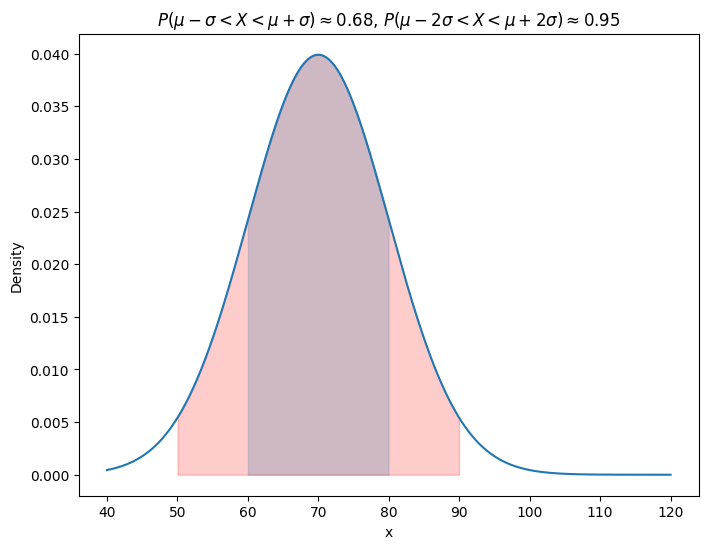

In [24]:
# Visualize the probability for one sigma above and below the mean

x = np.linspace(40, 120, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sd)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=((x > mu - sd) & (x < mu + sd)), color='skyblue', alpha=0.5)
plt.fill_between(x, y, where=((x > mu - 2 *sd) & (x < mu + 2 * sd)), color='red', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Density')
plt.title(r'$P(\mu - \sigma < X < \mu + \sigma) \approx 0.68$, $P(\mu - 2\sigma < X < \mu + 2\sigma) \approx 0.95$')


## Quantile Function

The CDF of a random variable gives the probability that the random variable is less than or equal to a given value. The quantile function is the inverse of the CDF and gives the value of the random variable for a given probability. For example, the 0.95 quantile of a random variable is the value such that the probability of the random variable being less than or equal to that value is 0.95. As there is no closed-form solution for the CDF of the normal distribution, you will need to use numerical methods (implemented in software) to calculate the quantile function or use tables.

:::{#exr-normal-distribution-quantile}
## River Level Quantiles

- Let us continue the example with the river level. What is the level of the river such that the probability of the river being below that level is 0.05 (the 0.05 quantile)?
- What is the level of the river such that the probability of the river being above that level is 0.05 (the 0.95 quantile)?

:::

Text(0.5, 1.0, 'Quantile function of the standard normal distribution')

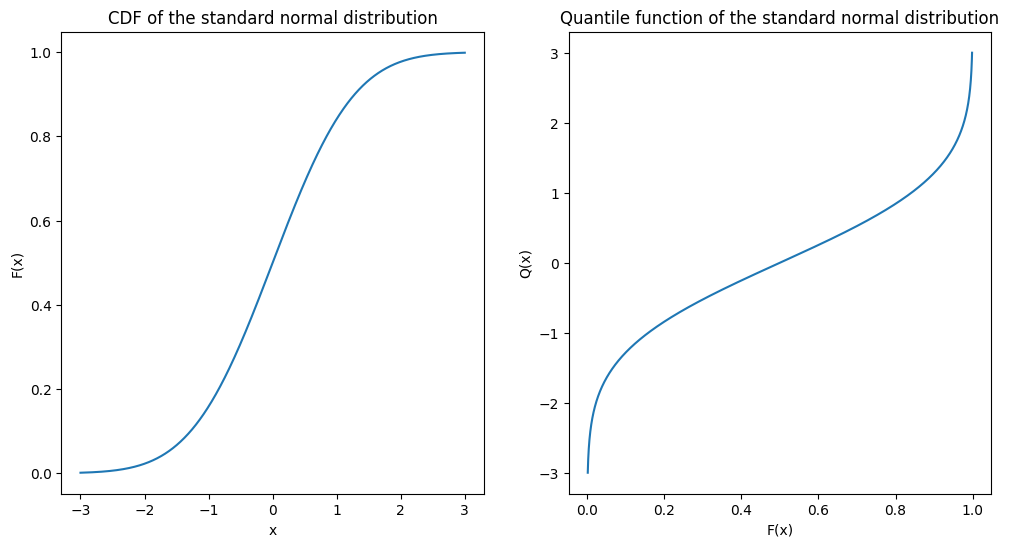

In [25]:
# Plot the CFD and the quantile function for the standard normal distribution

# Create a grid of x values

x = np.linspace(-3, 3, 1000)

# Calculate the CDF of the standard normal distribution

y_cdf = stats.norm.cdf(x)

# Calculate the quantile function of the standard normal distribution

y_quantile = stats.norm.ppf(y_cdf)

# Create the plot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y_cdf)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of the standard normal distribution')

plt.subplot(1, 2, 2)
plt.plot(y_cdf, x)
plt.xlabel('F(x)')
plt.ylabel('Q(x)')
plt.title('Quantile function of the standard normal distribution')

In [26]:
# Calculate the 0.05 quantile using the quantile function (called ppf (percentage point function) in scipy.stats)

print(stats.norm.ppf(0.05, loc=7, scale=1.5))

print(stats.norm.ppf(0.95, loc=7, scale=1.5))


4.532719559572791
9.467280440427208


Text(0.5, 1.0, 'P(X < 4.5) = 0.05, P(X > 9.5) = 0.05, P(4.5 < X < 9.5) = 0.9')

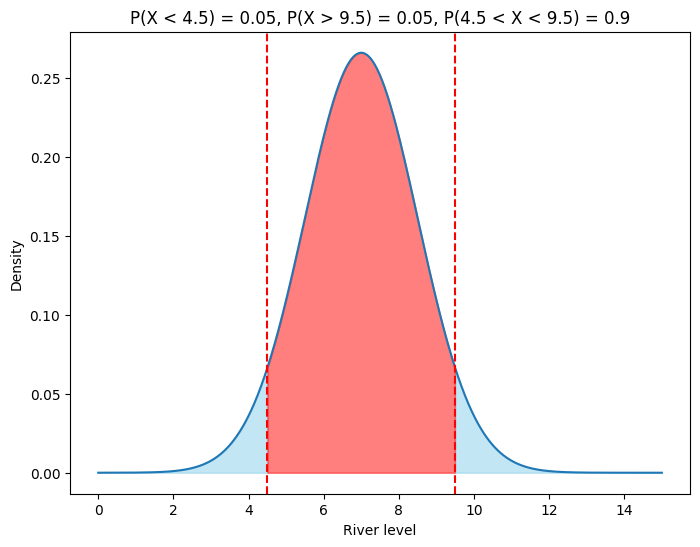

In [27]:
# Visualize the quantiles on the density plot

x = np.linspace(0, 15, 1000)

y = stats.norm.pdf(x, loc=7, scale=1.5)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x < 4.5), color='skyblue', alpha=0.5)
plt.fill_between(x, y, where=(x > 9.5), color='skyblue', alpha=0.5)
plt.fill_between(x, y, where=(x > 4.5) & (x < 9.5), color='red', alpha=0.5)
plt.axvline(4.5, color='red', linestyle='--')
plt.axvline(9.5, color='red', linestyle='--')
plt.xlabel('River level')
plt.ylabel('Density')
plt.title('P(X < 4.5) = 0.05, P(X > 9.5) = 0.05, P(4.5 < X < 9.5) = 0.9')


If you must use a z-table for the quantiles, you need to standardize first, because these tables usually only list the quantiles for the standard normal distribution.



In [28]:
# Create a z-table for the quantiles of the standard normal distribution

import pandas as pd
import numpy as np

# Define the range of probabilities

probabilities = np.arange(0.0, 0.11, 0.01)

# Calculate the quantiles for each probability

quantiles = stats.norm.ppf(probabilities)

# Create a DataFrame

df = pd.DataFrame({
    'P(x < Z)': probabilities,
    'Q(p)': quantiles
})

df


,P(x < Z),Q(p)
0,0.00,-inf
1,0.01,-2.326348
2,0.02,-2.053749
3,0.03,-1.880794
4,0.04,-1.750686
5,0.05,-1.644854
6,0.06,-1.554774
7,0.07,-1.475791
8,0.08,-1.405072
9,0.09,-1.340755


In [29]:
# To find the 0.05 quantile of the normal distribution with mean 7 and standard deviation 1.5 using a z-table
# we can first find the corresponding quantile of the standard normal distribution and then transform it back to the original scale.

# Find the 0.05 quantile of the standard normal distribution 

z = stats.norm.ppf(0.05) # You can also look it up in the table above
z

# Transform the quantile back to the original scale

quantile = 7 + 1.5 * z
quantile

np.float64(4.532719559572791)

In [30]:
# Check the result using the quantile function of the normal distribution with mean 7 and standard deviation 1.5

stats.norm.ppf(0.05, loc=7, scale=1.5)

np.float64(4.532719559572791)

# The Exponential Distribution (Optional)

We have already seen the geometric distribution, which models the number of trials until the first success in a sequence of independent Bernoulli trials. The exponential distribution is the continuous analog of the geometric distribution.

The PDF of the exponential distribution is given by:

$$
f(x) = \begin{cases}
\lambda e^{-\lambda x} & x \geq 0\\
0 & x < 0
\end{cases}
$$

:::{#exr-exponential-distribution-CDF}
## CDF of the Exponential Distribution

Calculate the CDF of the exponential distribution.
:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The CDF of the exponential distribution is given by:

$$
\begin{align*}
F(x) & = P(X \leq x) = \int_{-\infty}^{x} \lambda e^{-\lambda t} dt \\
     & = \int_{0}^{x} \lambda e^{-\lambda t} dt \\
     & = -e^{-\lambda t} \Big|_{0}^{x} \\
     & = -e^{-\lambda x} + e^{-\lambda \cdot 0} \\
     & = 1 - e^{-\lambda x}
\end{align*}
$$

:::


:::{#exr-exponential-distribution-expected-value}
## Expected Value of the Exponential Distribution

Calculate the expected value of the exponential distribution.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

To calculate the expected value of the exponential distribution, we need to evaluate the following integral:

$$
\begin{align*}
E(X) & = \int_{-\infty}^{\infty} x \lambda e^{-\lambda x} dx = \int_{0}^{\infty} x \lambda e^{-\lambda x} dx
\end{align*}
$$

We can use integration by parts to solve this integral. The integration by parts rule is related to the product rule for differentiation.

$$
(uv)' = u'v + uv'
$$

where both $u$ and $v$ are functions of $x$ and $u'$ and $v'$ are their derivatives with respect to $x$. Integrate both sides and rearrange to get the integration by parts formula:

$$
\int (uv)' dx = \int u'v dx + \int uv' dx \implies uv = \int u'v dx + \int uv' dx \implies \int uv' dx = uv - \int u'v dx
$$


In our integral it makes sense to choose $u = \lambda x$ and $v' = e^{-\lambda x}$ because the derivative of $u$ is a constant and the integral of $v'$ is easy to calculate. Note that 

$$
\int e^{-\lambda x} = \frac{e^{-\lambda x}}{-\lambda} + C
$$ 

where $C$ is the constant of integration. Now we are ready to apply the integration by parts formula:

$$
\begin{align*}
\int \lambda x e^{-\lambda x} dx & = \lambda x \frac{e^{-\lambda x}}{-\lambda} - \int \lambda \frac{e^{-\lambda x}}{-\lambda} dx \\
& = -x e^{-\lambda x} + \int e^{-\lambda x} dx \\
& = -x e^{-\lambda x} - \frac{e^{-\lambda x}}{\lambda} + C \\
& = e^{-\lambda x} (-x - \frac{1}{\lambda}) + C
\end{align*}
$$

Now that we have the expression for the integral, we can evaluate the expected value:

$$
\begin{align*}
E(X) & = \int_{0}^{\infty} x \lambda e^{-\lambda x} dx \\
 & = e^{-\lambda x} (-x - \frac{1}{\lambda}) \Big|_{0}^{\infty} \\
 & = \lim_{x \to \infty} e^{-\lambda x} (-x - \frac{1}{\lambda}) - e^{-\lambda \cdot 0} (-0 - \frac{1}{\lambda}) \\
 & = 0 - 0 - (-0 - \frac{1}{\lambda}) \\
 & = \frac{1}{\lambda}
\end{align*}
$$

Note that the last result uses the fact that $\lim_{x \to \infty} e^{-\lambda x} = 0$ and $\lim_{x \to \infty} x e^{-\lambda x} = 0$. The latter limit can be shown by applying L'Hopital's rule.

To find the variance of the exponential distribution, we can find the second uncentered momen of the distribution (i.e., $E(X^2)$) and then use the formula $\text{Var}(X) = E(X^2) - E(X)^2$. Again,
we can use integration by parts to find the integral.

$$
\begin{align*}
E(X^2) & = \int_{0}^{\infty} x^2 \lambda e^{-\lambda x} dx = \\
& =  -x^2 e^{-\lambda x}\Big|_{0}^{\infty} + \frac{2}{\lambda} \int_{0}^{\infty} \lambda x e^{-\lambda x} dx \\
& = 0 - 0 + \frac{2}{\lambda} \frac{1}{\lambda} = \frac{2}{\lambda^2}
\end{align*}
$$

Finally, we can calculate the variance:

$$
\begin{align*}
\text{Var}(X) & = E(X^2) - E(X)^2 = \frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}
\end{align*}
$$

:::
